In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#### 코랩 사용시

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
import os
os.getcwd()

'/content'

코랩 사용시 본인 구글 드라이브 경로는  
/content/drive/MyDrive/...  
입니다.

In [6]:
path = '/content/drive/MyDrive/Colab Notebooks/DSL/22-1/220203 Supervised Learning'    # 과제 데이터셋이 저장된 경로를 더 작성해주세요
os.chdir(path)

In [7]:
os.getcwd()

'/content/drive/MyDrive/Colab Notebooks/DSL/22-1/220203 Supervised Learning'

## 아파트 전월세 가격 회귀 모델

2020년 전국의 아파트 전월세 거래 데이터셋을 활용합니다.  
해당 데이터셋에서 전세 거래와 월세 거래를 구분한 후,  
보증금 혹은 월세에 가장 큰 영향을 미치는 feature를 찾아  
선형회귀 모델을 세우려고 합니다.

1) Apartment_train.csv, Apartment_test.csv 파일을  
apart_train, apart_test 라는 변수에 DataFrame 형태로 불러와주세요.

In [8]:
apart_train = pd.read_csv("Apartment_train.csv")
apart_test = pd.read_csv("Apartment_test.csv")

2) apart 데이터셋에서 월세와 전세를 구분하여  
다음과 같은 4개의 변수에 할당하려고 합니다.  

- train set에서 월세_train, 전세_train  
 test set에서 월세_test, 전세_test  

이에 해당하는 코드를 작성해주세요.


In [9]:
apart_train.head()

,시군구,단지명,전월세구분,전용면적(㎡),보증금(만원),월세(만원),층,건축년도
0,대구광역시,트윈팰리스,전세,84.1500,32000,0,13,2006
1,부산광역시,삼익비치,전세,73.9200,12000,0,8,1979
2,대구광역시,동대구반도유보라,월세,39.7596,1000,54,11,2018
3,대전광역시,주공1단지아파트,월세,26.3700,579,8,4,1993
4,광주광역시,선운지구진아리채,전세,78.0887,27000,0,1,2014


In [10]:
월세_train = apart_train[apart_train["전월세구분"] == "월세"]
전세_train = apart_train[apart_train["전월세구분"] == "전세"]

월세_test = apart_test[apart_test["전월세구분"] == "월세"]
전세_test = apart_test[apart_test["전월세구분"] == "전세"]

3) 이후 작업부터는 따로 언급이 없을 경우  
위에서 생성한 4개의 DataFrame 중  
train set만 이용하여 작업을 수행합니다.  

'월세'의 경우 월세 가격에,  
'전세'의 경우 보증금 가격에 
영향을 가장 많이 미치는 feature를 찾고자 합니다.  

다양한 방법을 동원해서,  
해당하는 feature를 '1개만' 찾아주세요.  

아마도 '월세'와 '전세' 두 경우에서 모두 같은 feature가 나올 것입니다.  

(hint: 상관계수행렬이나 산점도 이용)

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

In [ ]:
plt.rc('font', family='NanumBarunGothic')

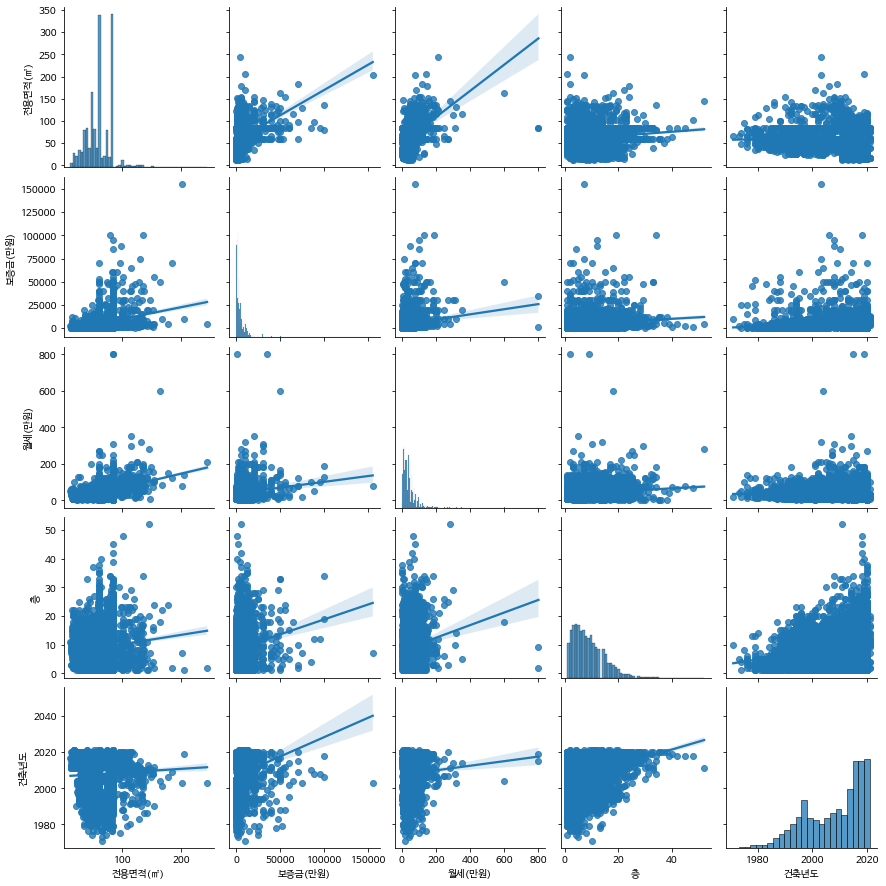

In [14]:
# 월세 
sns.pairplot(data=월세_train, kind = 'reg')
plt.show()

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


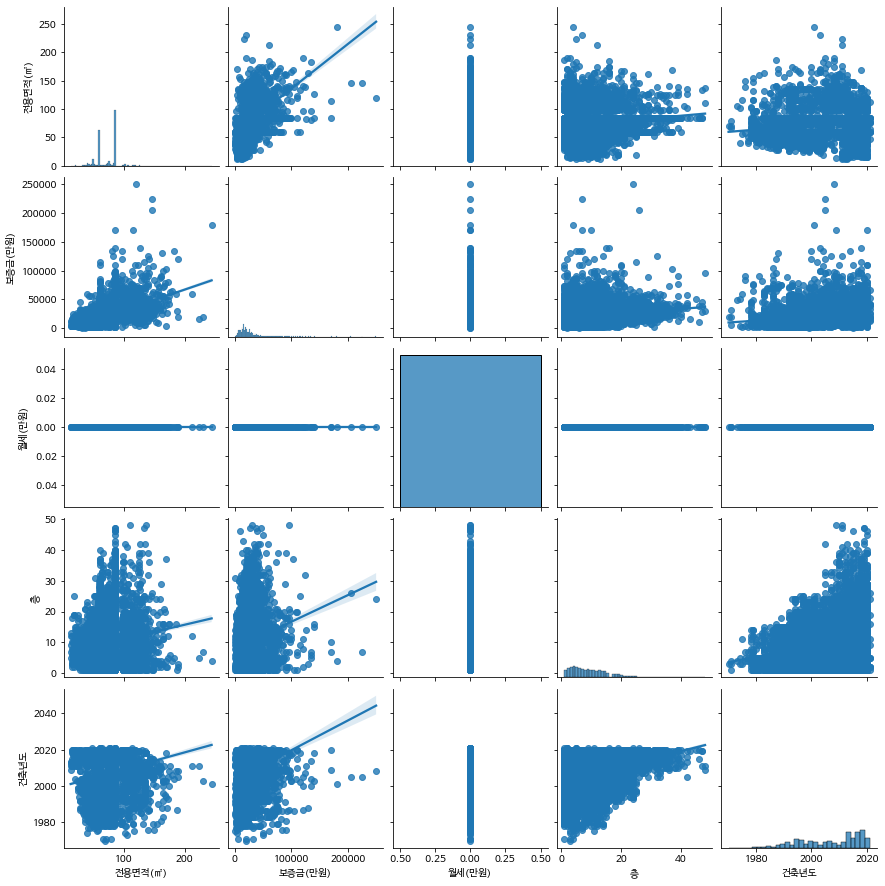

In [15]:
# 전세 
sns.pairplot(data=전세_train, kind = 'reg')
plt.show()

4) 위에서 찾은 feature를 이용해(이하 X라 칭함)  
'월세'의 경우 월세 가격(이하 y1),  
'전세'의 경우 보증금 가격(이하 y2)  
을 예측하는 모델을 세울 것입니다.

첫번째, 월세 가격을 예측하는 모델을 구축합니다.  
**파이프라인을 사용하지 않고** 작업합니다.  
수행해야할 작업은 다음과 같습니다.  
- 데이터를 scaling 합니다.  
 StandardScaler를 사용합니다.(변수명은 scaler)  
- X와 y1의 관계를 나타내는 선형회귀 모델을 구축합니다.  
LinearRegression Estimator(변수명은 lin_reg_1)를 사용합니다.

In [16]:
# 관련 모듈 import
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

In [30]:
# input 데이터는 X_train, target 데이터는 y1_train 변수에 할당
X_train = 월세_train['보증금(만원)']
y1_train = 월세_train['월세(만원)']

In [31]:
# 데이터 scaling 하기
# X 데이터만 scaling 하며,
# 기존 X_train 변수에 덮어씌웁니다.
scaler = StandardScaler()
X_train = X_train[:,np.newaxis] #2차원 데이터로 변환
X_train = scaler.fit_transform(X_train) #scaling
X_train

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  """


array([[-0.52973996],
       [-0.585986  ],
       [-0.39613892],
       ...,
       [ 2.00867994],
       [-0.39613892],
       [-0.39613892]])

In [35]:
# 선형회귀 모델 생성 후 fitting 시킵니다.
lin_reg1 = LinearRegression()
lin_reg1.fit(X_train, y1_train)

LinearRegression()

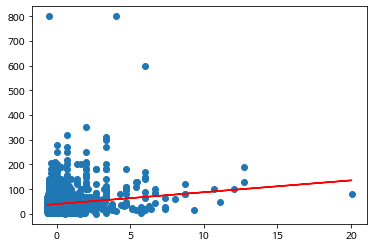

In [37]:
# 시각화. 체크용입니다.
plt.scatter(X_train[:, 0], y1_train)
plt.plot(X_train[:, 0], 
         lin_reg1.predict(X_train), 
         c='r');

테스트셋, 즉 '월세_test'와  
이미 fitting된 모델을 이용해 predict를 수행합니다.  
y1_hat 이라는 변수에 '월세_test'를 predict한 값을 할당합니다.

In [38]:
# input 데이터는 X_test, target 데이터는 y1_test 변수에 할당
X_test = 월세_test['보증금(만원)']
y1_test = 월세_test['월세(만원)']

In [39]:
# X_test 역시 정규화 해주어야 합니다. 주의할점?
X_test = X_test[:, np.newaxis] #2차원 데이터로 변환
X_test = scaler.transform(X_test) #fitting 시키면 안 됨
X_test

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  


array([[-0.28845647],
       [-0.05866267],
       [-0.12212317],
       ...,
       [-0.52973996],
       [-0.46293944],
       [ 0.00466423]])

In [40]:
# y1_hat에 predict값 할당
y1_hat = lin_reg.predict(X_test)

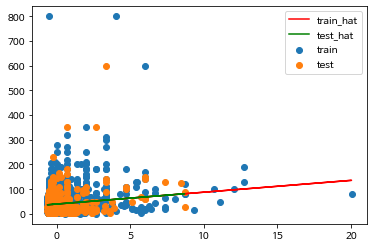

In [42]:
# 시각화. 체크용입니다.
plt.scatter(X_train[:, 0], y1_train, label='train')
plt.scatter(X_test[:, 0], y1_test, label='test')

plt.plot(X_train[:, 0], 
         lin_reg1.predict(X_train), 
         c='r', label='train_hat')
plt.plot(X_test[:, 0], 
         y1_hat, 
         c='g', label='test_hat')

plt.legend();

두번째, 전세 보증금 가격(y2) 예측 모델을 구축합니다.  
**파이프라인을 사용하여** 만듭니다. 
파이프라인 이름은 p1으로 정하고,  
수행해야할 작업은 다음과 같습니다.  
- 데이터를 scaling 합니다.  
StandardScaler를 사용합니다.(변수명은 scaler)  

- 다항 특성을 만들 것입니다.  
PolynomialFeatrues 변환기를 사용하며,  
차수는 자유이고 bias는 없습니다.(변수명은 poly)  

- X와 y2의 관계를 나타내는 Ridge 모델을 구축합니다.  
Ridge Estimator를 사용하며, hyperparameter는 자유롭게 설정합니다.  
(변수명은 rdg_reg_1)

In [43]:
# 관련 모듈 import
from sklearn.pipeline import Pipeline
#from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge

In [63]:
# 파이프라인 생성
p1 = Pipeline([('scaler', StandardScaler()),
               ('poly', PolynomialFeatures(degree=5, include_bias=False)),
               ('rdg_reg_1', Ridge(alpha=0.5))
])

In [79]:
p2 = Pipeline([('scaler', StandardScaler()),
               ('poly', PolynomialFeatures(degree=6, include_bias=False)),
               ('rdg_reg_1', Ridge(alpha=0.7))
])

In [58]:
전세_train.columns

Index(['시군구', '단지명', '전월세구분', '전용면적(㎡)', '보증금(만원)', '월세(만원)', '층', '건축년도'], dtype='object')

In [59]:
# input 데이터는 X_train, target 데이터는 y2_train 변수에 할당
X_train = 전세_train['전용면적(㎡)']
y2_train = 전세_train['보증금(만원)']

In [60]:
X_train = X_train[:, np.newaxis]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  """Entry point for launching an IPython kernel.


In [64]:
# 파이프라인 fitting
p1.fit(X_train, y2_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('poly', PolynomialFeatures(degree=5, include_bias=False)),
                ('rdg_reg_1', Ridge(alpha=0.5))])

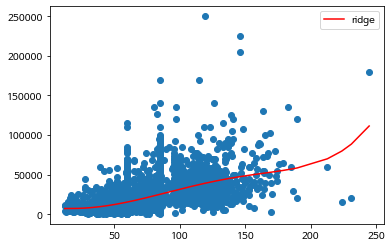

In [71]:
# 시각화. 체크용입니다.
# degree=5, alpha=0.5 적용하였을 경우
plt.scatter(X_train[:, 0], y2_train)
plt.plot(np.sort(X_train[:, 0]), 
         np.sort(p1.predict(X_train)), 
         c='r', label='ridge')
plt.legend();

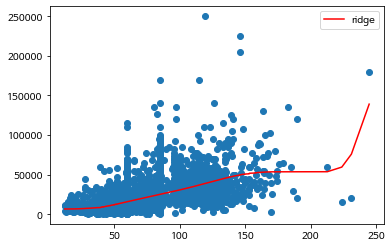

In [80]:
# degree=6, alpha=0.7 적용하였을 경우
p2.fit(X_train, y2_train)

plt.scatter(X_train[:, 0], y2_train)
plt.plot(np.sort(X_train[:, 0]), 
         np.sort(p2.predict(X_train)), 
         c='r', label='ridge')
plt.legend();

수고하셨습니다.